[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds-reboot/python-first-part/blob/main/notebooks/hometasks/Task3_dmrf_OOP.ipynb)

# Задание
Реализовать с помощью объектно-ориентированного подхода предыдущие 2 задания. Создайте для каждой из задач отдельный класс, который позволяет ее решить.

* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe, а также в excel, pickle, БД

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных

*  Сделать визуализацию для мини-исследования рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.



In [2]:
import requests

## Список объектов

In [25]:
offset_ = 1
limit_ = 1000
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
res = requests.get(url)
objects_data = res.json()

In [35]:
objects_data.keys()

dict_keys(['data', 'errcode'])

In [32]:
objects_data['data']['list'][len(objects_data['data']['list']) - 1]

{'objId': 46896,
 'developer': {'devId': 13315,
  'shortName': 'КВАРТАЛ В АКАДЕМИЧЕСКОМ.ЕКАТЕРИНБУРГ',
  'fullName': 'КВАРТАЛ В АКАДЕМИЧЕСКОМ.ЕКАТЕРИНБУРГ.СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК',
  'groupName': 'Брусника',
  'orgForm': {'id': 4,
   'fullForm': 'Общество с ограниченной ответственностью',
   'shortForm': 'ООО'},
  'companyGroup': 5791,
  'devInn': '6671163830'},
 'rpdRegionCd': 66,
 'objAddr': 'г Екатеринбург',
 'objCommercNm': 'Брусника в Академическом',
 'objFloorMin': 9,
 'objFloorMax': 11,
 'objElemLivingCnt': 296,
 'objReady100PercDt': '2024-12-31',
 'objSquareLiving': 18638.0,
 'objCompensFundFlg': 0,
 'objProblemFlg': 0,
 'latitude': 56.7676,
 'longitude': 60.5319,
 'problemFlag': 'NONE',
 'siteStatus': 'Строящиеся',
 'objGuarantyEscrowFlg': 1,
 'residentialBuildings': 1,
 'rpdNum': '66-001199',
 'pdId': 607530,
 'buildType': 'Жилое',
 'objStatus': 0}

# Данные по определенному объекту

In [7]:
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/36774'
res = requests.get(url)
objects_data = res.json()

In [8]:
objects_data

{'data': {'id': 36774,
  'pdId': 351714,
  'developer': {'devId': 6926,
   'devShortCleanNm': 'ОКЕАН',
   'devShortNm': 'ОКЕАН',
   'devFullCleanNm': 'ОКЕАН',
   'problObjCnt': 0,
   'buildObjCnt': 1,
   'comissObjCnt': 0,
   'regRegionDesc': 'Башкортостан Республика',
   'devPhoneNum': '+7(927)300-31-01',
   'devSite': 'altun-yar.ru',
   'devEmail': 'khabibovr@mail.ru',
   'devInn': '0277093608',
   'devOgrn': '1080277004521',
   'devKpp': '027701001',
   'devLegalAddr': 'Башкортостан Республика, город Уфа, проспект Проспект Октября дом 85',
   'devFactAddr': 'Респ Башкортостан Город Уфа Проспект Октября д. 85',
   'lastRpdId': 511041,
   'fundGuarantyFlg': 0,
   'devOrgRegRegionCd': 2,
   'devEmplMainFullNm': 'Хабибов Рамиль Хамидуллович',
   'developerGroupName': 'Океан',
   'orgForm': {'id': 4,
    'fullForm': 'Общество с ограниченной ответственностью',
    'shortForm': 'ООО'},
   'companyGroupId': 7250,
   'objGuarantyEscrowFlg': 1,
   'govFundFlg': 0},
  'region': 2,
  'address':

In [76]:
from tqdm import tqdm
import pandas as pd
import sqlite3

In [176]:
class DomIdLoader:
    def __init__(self):
        self.offset_ = 1
        self.limit_ = 100
        self.url = 'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object'
        self.objects_data = None
        self.ids = None
    
    # получить массив с id каждой недвижимости
    def get_ids(self):
        paramz = {
            'offset': self.offset_,
            'limit': self.limit_,
            'sortField':'devId.devShortCleanNm',
            'sortType':'asc',
            'objStatus':'0',
        }
        res = requests.get(url, params=paramz)

        self.objects_data = res.json()
        self.objects_data = self.objects_data['data']['list']
        self.ids = [i.get('objId') for i in self.objects_data]
        return self.ids
    # вывод массива
    def show_ids(self):
        print(self.ids)


In [180]:
class ObjectInfoExtractor(DomIdLoader):
    def __init__(self):
        self.offset_ = 1
        self.limit_ = 100
        self.url = 'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object'
        self.objects_data = None
        self.ids = []
        self.final_data = []
        
    def load_data(self):
        for i in tqdm(self.ids):
            self.url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{i}'
            res = requests.get(self.url)
            self.final_data.append(res.json()['data'])

    def df_converter(self):
        return pd.json_normalize(self.final_data)
    
    def transformation_data(self, df):
        cat_features_mask = (df.dtypes == "object").values

        # для вещественнозначных признаков заполним пропуски средними
        X_real = df[df.columns[~cat_features_mask]]
        mis_replacer = SimpleImputer(strategy="mean")
        X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns)

        # для категориальных - пустыми строками
        X_cat = df[df.columns[cat_features_mask]].fillna("")
        X_1 = pd.concat([X_no_mis_real, X_cat], axis=1)
        
        self.final_data = X_1
        return X_1

**Скачаем данные используя наши новые классы)**

In [81]:
a = DomIdLoader()
b = ObjectInfoExtractor(a.get_ids())
b.load_data()
df = b.df_converter()


100%|██████████| 1000/1000 [06:37<00:00,  2.52it/s]


Тут демонстрируется работа наследования))

In [182]:
c = ObjectInfoExtractor()
c.get_ids()
c.load_data()
df1 = c.transformation_data(c.df_converter())
df1

100%|██████████| 1000/1000 [03:09<00:00,  5.27it/s]


,id,pdId,region,floorMin,floorMax,objElemLivingCnt,objElemParkingCnt,objSquareLiving,objCompensFundFlg,objProblemFlg,...,complexShortNm,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.isWalk,metro.colors
0,13383.0,28105.0,72.0,4.0,20.0,68.0,31.0,6293.78,1.0,0.0,...,,,,,,,,,,
1,13397.0,28141.0,72.0,6.0,12.0,65.0,0.0,6248.51,0.0,0.0,...,,,,,,,,,,
2,13398.0,28141.0,72.0,7.0,10.0,43.0,0.0,4812.98,0.0,0.0,...,,,,,,,,,,
3,13399.0,28141.0,72.0,1.0,1.0,0.0,125.0,0.00,0.0,0.0,...,,,,,,,,,,
4,13391.0,28101.0,72.0,3.0,12.0,44.0,41.0,4297.44,1.0,0.0,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,36585.0,341403.0,54.0,7.0,19.0,273.0,189.0,19638.61,0.0,0.0,...,,,,,,,,,,
996,42678.0,503705.0,54.0,7.0,19.0,339.0,182.0,25446.34,0.0,0.0,...,,,,,,,,,,
997,47111.0,615026.0,54.0,9.0,17.0,243.0,65.0,14213.34,0.0,0.0,...,,,,,,,,,,
998,46896.0,607530.0,66.0,9.0,11.0,296.0,99.0,18638.00,0.0,0.0,...,,,,,,,,,,


**Проведем EDA - разведочный анализ данных и приведем их в боллее правильный вид**

In [112]:
df.shape

(1000, 109)

**Смотрим наличие пропусков**

In [127]:
nulls = df.isna().sum()
col = df.columns
index = []
for i in col:
    index.append(i)
    print (i, nulls[i])

id 0
pdId 0
region 0
address 1
floorMin 1
floorMax 0
objElemLivingCnt 0
objReady100PercDt 0
wallMaterialShortDesc 0
objLkFinishTypeDesc 0
objLkFreePlanDesc 1
objElemParkingCnt 0
objSquareLiving 0
rpdNum 0
rpdPdfLink 0
rpdIssueDttm 0
objLkLatitude 0
objLkLongitude 0
objCompensFundFlg 0
objProblemFlg 0
objLkClassDesc 0
loadDttm 0
photoRenderDTO 0
objGuarantyEscrowFlg 0
objectType 0
miniUrl 9
residentialBuildings 0
newBuildingId 0
objFloorCnt 0
objFlatCnt 0
objFlatSq 0
objNonlivElemCnt 0
objStatus 0
isAvailableWantLiveHere 0
objTransferPlanDt 36
objLivCeilingHeight 173
objInfrstrBicycleLaneFlg 0
objInfrstrPlaygrndCnt 25
objInfrstrSportGroundCnt 27
objInfrstrTrashAreaCnt 25
objInfrstrObjPrkngCnt 25
objInfrstrNotObjPrkngCnt 25
objInfrstrRampFlg 0
objInfrstrCurbLoweringFlg 0
objElevatorWheelchairCnt 25
objElevatorPassengerCnt 25
objElevatorCargoCnt 25
objElevatorCargoPassengerCnt 0
soldOutPerc 358
objPriceAvg 360
generalContractorNm 330
nonlivFirstFloor 1
objectTransportInfo 0
conclusion 0
o

**Определяем тип признаков категориальный или вещественный**

In [136]:
nulls = df.dtypes
col = df.columns
index = []
for i in col:
    index.append(i)
    print (i, nulls[i])

id int64
pdId int64
region int64
address object
floorMin float64
floorMax int64
objElemLivingCnt int64
objReady100PercDt object
wallMaterialShortDesc object
objLkFinishTypeDesc object
objLkFreePlanDesc object
objElemParkingCnt int64
objSquareLiving float64
rpdNum object
rpdPdfLink object
rpdIssueDttm object
objLkLatitude object
objLkLongitude object
objCompensFundFlg int64
objProblemFlg int64
objLkClassDesc object
loadDttm object
photoRenderDTO object
objGuarantyEscrowFlg int64
objectType object
miniUrl object
residentialBuildings int64
newBuildingId int64
objFloorCnt int64
objFlatCnt int64
objFlatSq object
objNonlivElemCnt int64
objStatus int64
isAvailableWantLiveHere bool
objTransferPlanDt object
objLivCeilingHeight object
objInfrstrBicycleLaneFlg int64
objInfrstrPlaygrndCnt float64
objInfrstrSportGroundCnt float64
objInfrstrTrashAreaCnt float64
objInfrstrObjPrkngCnt float64
objInfrstrNotObjPrkngCnt float64
objInfrstrRampFlg int64
objInfrstrCurbLoweringFlg int64
objElevatorWheelchair

**Заполняем пропуски, чтобы не мешались**

In [139]:
from sklearn.impute import SimpleImputer

cat_features_mask = (df.dtypes == "object").values

# для вещественнозначных признаков заполним пропуски средними
X_real = df[df.columns[~cat_features_mask]]
mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns)

# для категориальных - пустыми строками
X_cat = df[df.columns[cat_features_mask]].fillna("")
X_1 = pd.concat([X_no_mis_real, X_cat], axis=1)

X_1.head()

,id,pdId,region,floorMin,floorMax,objElemLivingCnt,objElemParkingCnt,objSquareLiving,objCompensFundFlg,objProblemFlg,...,complexShortNm,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.isWalk,metro.colors
0,13397.0,28141.0,72.0,6.0,12.0,65.0,0.0,6248.51,0.0,0.0,...,,,,,,,,,,
1,13391.0,28101.0,72.0,3.0,12.0,44.0,41.0,4297.44,1.0,0.0,...,,,,,,,,,,
2,13383.0,28105.0,72.0,4.0,20.0,68.0,31.0,6293.78,1.0,0.0,...,,,,,,,,,,
3,13398.0,28141.0,72.0,7.0,10.0,43.0,0.0,4812.98,0.0,0.0,...,,,,,,,,,,
4,13399.0,28141.0,72.0,1.0,1.0,0.0,125.0,0.00,0.0,0.0,...,,,,,,,,,,


На основе анализа признаков, были выявлены возможные самые релевантные признаки, которые дают больше информации для анализа

In [188]:
index_analisis = ['region', 'floorMin', 'floorMax', 'objElemLivingCnt', 'objElemParkingCnt', 'objSquareLiving', 'objCompensFundFlg', 'objLkClassDesc', 'objElevatorPassengerCnt', 'objLkFinishTypeDesc', 'wallMaterialShortDesc']

In [126]:
index

['id',
 'pdId',
 'region',
 'address',
 'floorMin',
 'floorMax',
 'objElemLivingCnt',
 'objReady100PercDt',
 'wallMaterialShortDesc',
 'objLkFinishTypeDesc',
 'objLkFreePlanDesc',
 'objElemParkingCnt',
 'objSquareLiving',
 'rpdNum',
 'rpdPdfLink',
 'rpdIssueDttm',
 'objLkLatitude',
 'objLkLongitude',
 'objCompensFundFlg',
 'objProblemFlg',
 'objLkClassDesc',
 'loadDttm',
 'photoRenderDTO',
 'objGuarantyEscrowFlg',
 'objectType',
 'miniUrl',
 'residentialBuildings',
 'newBuildingId',
 'objFloorCnt',
 'objFlatCnt',
 'objFlatSq',
 'objNonlivElemCnt',
 'objStatus',
 'isAvailableWantLiveHere',
 'objTransferPlanDt',
 'objLivCeilingHeight',
 'objInfrstrBicycleLaneFlg',
 'objInfrstrPlaygrndCnt',
 'objInfrstrSportGroundCnt',
 'objInfrstrTrashAreaCnt',
 'objInfrstrObjPrkngCnt',
 'objInfrstrNotObjPrkngCnt',
 'objInfrstrRampFlg',
 'objInfrstrCurbLoweringFlg',
 'objElevatorWheelchairCnt',
 'objElevatorPassengerCnt',
 'objElevatorCargoCnt',
 'objElevatorCargoPassengerCnt',
 'soldOutPerc',
 'objPrice

In [88]:
df['developer.bankruptStage.bankruptStageDesc'].unique()

array([nan,
       'Сообщение о судебном акте. О завершении конкурсного производства',
       'Сообщение о судебном акте. О прекращении производства по делу или об отказе в признании должника банкротом',
       'Сообщение о судебном акте. О введении внешнего управления',
       'Сообщение о судебном акте. О признании должника банкротом и открытии конкурсного производства'],
      dtype=object)

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
X_1.shape

(1000, 109)

In [168]:
X_1[index_analisis]

,region,floorMin,floorMax,objElemLivingCnt,objElemParkingCnt,objSquareLiving,objCompensFundFlg,objProblemFlg,objLkClassDesc,objElevatorPassengerCnt,objLkFinishTypeDesc,wallMaterialShortDesc
0,72.0,6.0,12.0,65.0,0.0,6248.51,0.0,0.0,Элитный,5.0,Без отделки,Другое
1,72.0,3.0,12.0,44.0,41.0,4297.44,1.0,0.0,Элитный,2.0,По желанию заказчика,Другое
2,72.0,4.0,20.0,68.0,31.0,6293.78,1.0,0.0,Элитный,5.0,По желанию заказчика,Другое
3,72.0,7.0,10.0,43.0,0.0,4812.98,0.0,0.0,Элитный,3.0,Без отделки,Другое
4,72.0,1.0,1.0,0.0,125.0,0.00,0.0,0.0,Элитный,8.0,Без отделки,Другое
...,...,...,...,...,...,...,...,...,...,...,...,...
995,54.0,9.0,17.0,243.0,65.0,14213.34,0.0,0.0,Комфорт,6.0,Под ключ,Монолит-кирпич
996,54.0,7.0,19.0,339.0,182.0,25446.34,0.0,0.0,Комфорт,8.0,Под чистовую,Монолит-кирпич
997,54.0,7.0,19.0,273.0,189.0,19638.61,0.0,0.0,Комфорт,6.0,Без отделки,Монолит-кирпич
998,66.0,9.0,17.0,318.0,99.0,21872.10,0.0,0.0,Типовой,0.0,Под чистовую,Монолит-кирпич


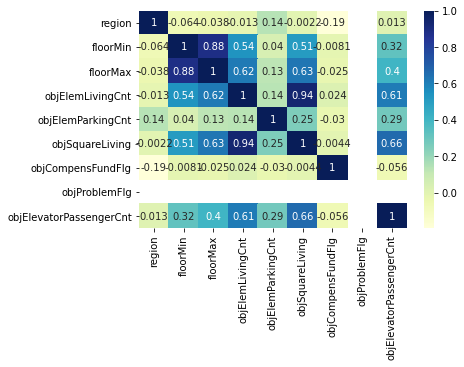

In [169]:
dataplot = sns.heatmap(X_1[index_analisis].corr(), cmap="YlGnBu", annot=True)

In [229]:
class Saver:
    def __init__(self, data):
        self.data = data
        
    def save_csv(self):
        df.to_csv('objects.csv')

    def save_xl(self):
        df.to_excel('objects.xlsx')

    def save_sql(self):
        df.to_sql('products', conn, if_exists='replace', index = False)
        conn.commit()
        conn.close()
        
    def save_pickle(self):
        df.to_pickle('objects.pkl')
        
class Visualizer:
    def __init__(self,data):
        self.data = data

    def make_boxplot(self, x_axis, y_axis):
        sns.catplot(x= x_axis, y=y_axis, data=self.data[[x_axis, y_axis]], kind='boxen', height=4, aspect=2); 

    def make_heatmap(self, arr_columns):
        sns.heatmap(X_1[index_analisis].corr(), cmap="YlGnBu", annot=True)
        
    def make_pie(self, names, counts):
        wedge_properties = {"edgecolor":"k",'linewidth': 1}
        plt.pie(counts, labels=names, startangle=30,
           counterclock=False, shadow=True, wedgeprops=wedge_properties,
           autopct="%1.1f%%", pctdistance=0.7)
        plt.title("Analysis")
        plt.show()
        

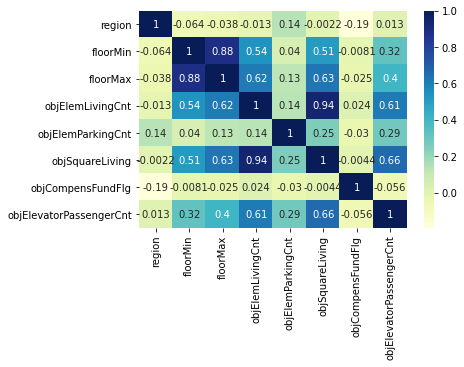

In [230]:
d = Visualizer(X_1)
d.make_heatmap(index_analisis)

На основе данной Heatmap, мы можем сделать несколько необычныъ выводов о недвижимости
objSquareLiving - objElevatorPassengerCnt
FloorMax(floormin) - objSquareLiving
objElevatorPassengerCnt - objElementsLivingCnt

Данные корреляции не совсем очевидны и могут дать положительные инсайды и использоваться при обучении моделей)

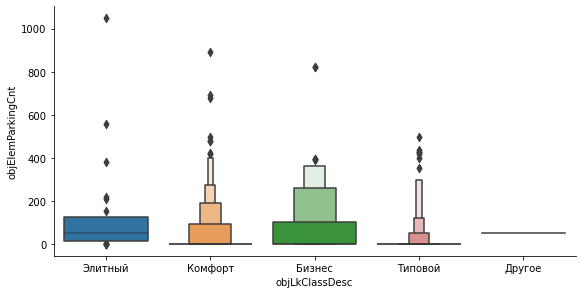

In [231]:
d.make_boxplot('objLkClassDesc', 'objElemParkingCnt')

 Из данного графика, можно сделать вывод о том, что большое количество элитных зданий имеет мало парковок, у типовых вообще мало парковок. Бизнес класс и комфорт предоставляют больший range парковочных мест для своих обитателей

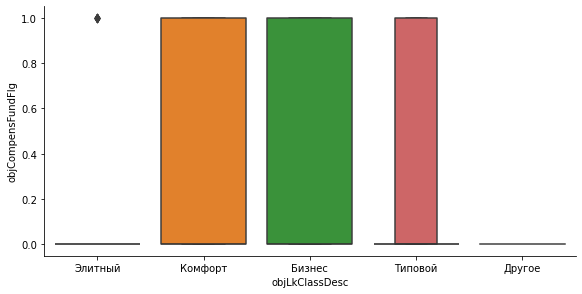

In [232]:
d.make_boxplot('objLkClassDesc', 'objCompensFundFlg')

Для элитного типа жилья нет никакого финансирования

In [233]:
df['wallMaterialShortDesc'].value_counts().to_list()

[521, 221, 204, 22, 20, 12]

In [234]:
df['wallMaterialShortDesc'].unique().tolist()

['Другое', 'Монолит-кирпич', 'Панель', 'Кирпич', 'Монолит', 'Блоки']

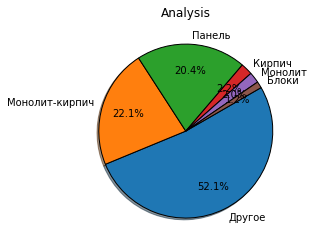

In [235]:
d.make_pie(df['wallMaterialShortDesc'].unique().tolist(), df['wallMaterialShortDesc'].value_counts().to_list())

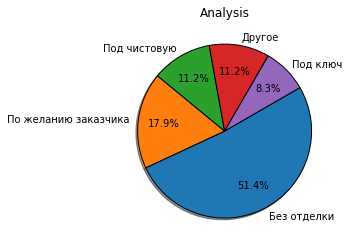

In [236]:
d.make_pie(df['objLkFinishTypeDesc'].unique().tolist(), df['objLkFinishTypeDesc'].value_counts().to_list())

In [239]:
s = Saver(X_1)
s.save_xl()

In [240]:
s.save_csv()

In [242]:
s.save_pickle()